# MACHINE LEARNING WITH CARET PACKAGE
 This is to understand the syntax of the caret package!!!!!!!!

In [1]:
# Here i found an advertising dataset that will fit good for regression
install.packages("caret")
library(caret)
install.packages("mlbench")
library(mlbench)

Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\blake\Documents\R\win-library\3.6\00LOCK\caret\libs\x64\caret.dll to C:\Users\blake\Documents\R\win-library\3.6\caret\libs\x64\caret.dll: Permission denied"Warning message:
"restored 'caret'"


The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\RtmpIdDtCN\downloaded_packages


Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'mlbench' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\RtmpIdDtCN\downloaded_packages


Warning message:
"package 'mlbench' was built under R version 3.6.3"

In [4]:
df <- read.csv("Advertising.csv")
summary(df) # no NA values

    RecordID            TV             Radio          Newspaper     
 Min.   :  1.00   Min.   :  0.70   Min.   : 0.000   Min.   :  0.30  
 1st Qu.: 50.75   1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75  
 Median :100.50   Median :149.75   Median :22.900   Median : 25.75  
 Mean   :100.50   Mean   :147.04   Mean   :23.264   Mean   : 30.55  
 3rd Qu.:150.25   3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10  
 Max.   :200.00   Max.   :296.40   Max.   :49.600   Max.   :114.00  
     Sales      
 Min.   : 1.60  
 1st Qu.:10.38  
 Median :12.90  
 Mean   :14.02  
 3rd Qu.:17.40  
 Max.   :27.00  

In [5]:
# Using Caret for Regression to test insample vs out of sample rmse to reduce overfitting 
#Here we will will make a model
# just get rid of the first column record id
df <- df[-1] # just get rid of the first column record id


In [6]:
# Regression 
mdl <- lm(Sales ~., df)

# Predict using full data
pred <- predict(mdl, df)

# Compute errors: error
error <- pred - df[["Sales"]]

# Calculate RMSE
sqrt(mean(error ^ 2))


[1] 1.66857

In [7]:
# MAKING TRAIN AND TEST
#Out of sample error 
#First lets split our data
set.seed(34)

# Shuffle row indices:rows
rows <- sample(nrow(df))

#Randomly order data
shuffled_df <- df[rows, ]

# Determine row to split on: split
split <- round(nrow(df) * 0.80) # use 80% of data for training

# Create train
train <- df[1:split, ] # 1:80% of dataset or row 160 

# Create test
test <- df[(split + 1):nrow(df), ] # take the rest of the rows in the df that is not test


In [8]:
# Fit lm model on train: model
model <- lm(Sales ~ ., train)

# Predict on test: p
p <- predict(model, test)

# Compute errors: error
error <- p - test[["Sales"]]

# Calculate RMSE
sqrt(mean(error^2))


[1] 1.670672

# 10 FOLD CROSS VALIDATION

In [9]:
# Now fit the linear regression using 10-fold Cross Validation instead
# Fit lm model using 10-fold CV: model
# we will need caret for this 
model <- train(
  Sales ~ ., 
  df,
  method = "lm",
  trControl = trainControl(
    method = "cv", 
    number = 10,
    verboseIter = TRUE
  )
)
# Print model to console
model

+ Fold01: intercept=TRUE 
- Fold01: intercept=TRUE 
+ Fold02: intercept=TRUE 
- Fold02: intercept=TRUE 
+ Fold03: intercept=TRUE 
- Fold03: intercept=TRUE 
+ Fold04: intercept=TRUE 
- Fold04: intercept=TRUE 
+ Fold05: intercept=TRUE 
- Fold05: intercept=TRUE 
+ Fold06: intercept=TRUE 
- Fold06: intercept=TRUE 
+ Fold07: intercept=TRUE 
- Fold07: intercept=TRUE 
+ Fold08: intercept=TRUE 
- Fold08: intercept=TRUE 
+ Fold09: intercept=TRUE 
- Fold09: intercept=TRUE 
+ Fold10: intercept=TRUE 
- Fold10: intercept=TRUE 
Aggregating results
Fitting final model on full training set


Linear Regression 

200 samples
  3 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 181, 179, 180, 180, 179, 180, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  1.680437  0.8935956  1.269404

Tuning parameter 'intercept' was held constant at a value of TRUE

In [10]:
# Fit lm model using 5-fold CV: model to see difference
model2 <- train(
  Sales ~ ., 
  df,
  method = "lm",
  trControl = trainControl(
    method = "cv", 
    number = 5,
    verboseIter = TRUE
  )
)

# Print model to console
model2 #Slightly higher rmse

+ Fold1: intercept=TRUE 
- Fold1: intercept=TRUE 
+ Fold2: intercept=TRUE 
- Fold2: intercept=TRUE 
+ Fold3: intercept=TRUE 
- Fold3: intercept=TRUE 
+ Fold4: intercept=TRUE 
- Fold4: intercept=TRUE 
+ Fold5: intercept=TRUE 
- Fold5: intercept=TRUE 
Aggregating results
Fitting final model on full training set


Linear Regression 

200 samples
  3 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 161, 161, 159, 159, 160 
Resampling results:

  RMSE      Rsquared   MAE     
  1.694525  0.8985257  1.278135

Tuning parameter 'intercept' was held constant at a value of TRUE

In [11]:
# Fit lm model using 5 x 5-fold CV: model
model3 <- train(
  Sales ~ ., 
  df,
  method = "lm",
  trControl = trainControl(
    method = "repeatedcv", 
    number = 5,
    repeats = 5, #this allows you to repeat the 5 fold 5 times
    verboseIter = TRUE
  )
)

# Print model to console
model3 #Slightly higher again

+ Fold1.Rep1: intercept=TRUE 
- Fold1.Rep1: intercept=TRUE 
+ Fold2.Rep1: intercept=TRUE 
- Fold2.Rep1: intercept=TRUE 
+ Fold3.Rep1: intercept=TRUE 
- Fold3.Rep1: intercept=TRUE 
+ Fold4.Rep1: intercept=TRUE 
- Fold4.Rep1: intercept=TRUE 
+ Fold5.Rep1: intercept=TRUE 
- Fold5.Rep1: intercept=TRUE 
+ Fold1.Rep2: intercept=TRUE 
- Fold1.Rep2: intercept=TRUE 
+ Fold2.Rep2: intercept=TRUE 
- Fold2.Rep2: intercept=TRUE 
+ Fold3.Rep2: intercept=TRUE 
- Fold3.Rep2: intercept=TRUE 
+ Fold4.Rep2: intercept=TRUE 
- Fold4.Rep2: intercept=TRUE 
+ Fold5.Rep2: intercept=TRUE 
- Fold5.Rep2: intercept=TRUE 
+ Fold1.Rep3: intercept=TRUE 
- Fold1.Rep3: intercept=TRUE 
+ Fold2.Rep3: intercept=TRUE 
- Fold2.Rep3: intercept=TRUE 
+ Fold3.Rep3: intercept=TRUE 
- Fold3.Rep3: intercept=TRUE 
+ Fold4.Rep3: intercept=TRUE 
- Fold4.Rep3: intercept=TRUE 
+ Fold5.Rep3: intercept=TRUE 
- Fold5.Rep3: intercept=TRUE 
+ Fold1.Rep4: intercept=TRUE 
- Fold1.Rep4: intercept=TRUE 
+ Fold2.Rep4: intercept=TRUE 
- Fold2.Re

Linear Regression 

200 samples
  3 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 161, 160, 160, 160, 159, 161, ... 
Resampling results:

  RMSE     Rsquared  MAE     
  1.70042  0.896364  1.278439

Tuning parameter 'intercept' was held constant at a value of TRUE

In [12]:
# Predict on full advertising dataset using 10 fold cross validation
p2 <- predict(model,test)

# Compute errors: error
error2 <- p2 - test[["Sales"]]

# Calculate RMSE
sqrt(mean(error^2)) # just about the same lower than train!!!


[1] 1.670672

# Logistic Regression

In [14]:
# LOGISTIC REGRESSION (CLASSIFICATION)
# lets change the sales to a binary value for logistic regression!
range(df$Sales) # 1.6 to 27.0
mean(df$Sales) # 14.025

# Make column if sales are over 14 then it is 1 ("high sales") and less than 14 it is 0 
df$Sales2 <- ifelse(df$Sales< 14,0,1);

# Make df that doesnt include original sales column
df_c <- df[-4] # get rid of 4th column

# Get the number of observations
n_obs <- nrow(df_c)


[1]  1.6 27.0

[1] 14.0225

In [15]:
# Shuffle row indices: permuted_rows
permuted_rows <- sample(n_obs)

# Randomly order data: df_c
df_c_shuffled <- df_c[permuted_rows, ]

# Identify row to split on: split
split <- round(n_obs * 0.6)

# Create train
train <- df_c_shuffled[1:split, ]

# Create test
test <- df_c_shuffled[(split + 1):n_obs, ]


In [16]:
# Fit glm model: model
model <- glm(Sales2 ~ ., family = "binomial", train)
summary(model)


Call:
glm(formula = Sales2 ~ ., family = "binomial", data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.94428  -0.06661  -0.00038   0.04728   1.94946  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -22.672039   5.966133  -3.800 0.000145 ***
TV            0.076966   0.020210   3.808 0.000140 ***
Radio         0.439735   0.117605   3.739 0.000185 ***
Newspaper     0.001575   0.023283   0.068 0.946053    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 164.718  on 119  degrees of freedom
Residual deviance:  29.435  on 116  degrees of freedom
AIC: 37.435

Number of Fisher Scoring iterations: 9


In [17]:
# Predict on test: p
p <- predict(model, test, type = "response")

# If p exceeds threshold of 0.5, High (1) else (0) Low: H_or_L
# get middle threshold
mean(p)
h_or_l <- ifelse(p > 0.5, 1, 0)
h_or_l <- as.factor(h_or_l) # making it a factor
test$sales2 <- as.factor(test$Sales2) # making it factor

# Create confusion matrix must have the two comparison columns same level and type (this case factor)
confusionMatrix(h_or_l, test$sales2) #92% accuracy pretty good


[1] 0.4411503

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 42  4
         1  1 33
                                          
               Accuracy : 0.9375          
                 95% CI : (0.8601, 0.9794)
    No Information Rate : 0.5375          
    P-Value [Acc > NIR] : 3.302e-15       
                                          
                  Kappa : 0.8736          
                                          
 Mcnemar's Test P-Value : 0.3711          
                                          
            Sensitivity : 0.9767          
            Specificity : 0.8919          
         Pos Pred Value : 0.9130          
         Neg Pred Value : 0.9706          
             Prevalence : 0.5375          
         Detection Rate : 0.5250          
   Detection Prevalence : 0.5750          
      Balanced Accuracy : 0.9343          
                                          
       'Positive' Class : 0               
                                    

In [18]:
# Using different classification thrushold
# 10% would catch more high sales with less certainty 
# 90% would catch less high sales with more certainty

# If p exceeds threshold of 0.9
h_or_l <- ifelse(p > 0.9, 1, 0)
h_or_l <- as.factor(h_or_l) # making it a factor

# Create confusion matrix 90% now
#For example, pretend you want to identify the objects you are really certain are highsales. In this case, you might want to use a probability threshold of 
confusionMatrix(h_or_l, test$sales2)  # only 90% accuracy 
#sensitivity is the ability of a test to correctly identify those that are high sales (true positive rate)
# less accuracy now but higher certainty or (sensitivity)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 42  7
         1  1 30
                                          
               Accuracy : 0.9             
                 95% CI : (0.8124, 0.9558)
    No Information Rate : 0.5375          
    P-Value [Acc > NIR] : 2.681e-12       
                                          
                  Kappa : 0.7966          
                                          
 Mcnemar's Test P-Value : 0.0771          
                                          
            Sensitivity : 0.9767          
            Specificity : 0.8108          
         Pos Pred Value : 0.8571          
         Neg Pred Value : 0.9677          
             Prevalence : 0.5375          
         Detection Rate : 0.5250          
   Detection Prevalence : 0.6125          
      Balanced Accuracy : 0.8938          
                                          
       'Positive' Class : 0               
                                    

In [19]:
# If p exceeds threshold of 0.1
# we want to be really certain that model correctly predicts all high sales
h_or_l <- ifelse(p > 0.1, 1, 0)
h_or_l <- as.factor(h_or_l) # making it a factor

# Create confusion matrix 10% now
confusionMatrix(h_or_l, test$sales2) #95% accuracy pretty good
#specificity is the ability of the test to correctly identify those that are not high sales (true negative rate).
# higher accuracy now but make sure predicted is correct (higher specificity)


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 36  1
         1  7 36
                                          
               Accuracy : 0.9             
                 95% CI : (0.8124, 0.9558)
    No Information Rate : 0.5375          
    P-Value [Acc > NIR] : 2.681e-12       
                                          
                  Kappa : 0.8011          
                                          
 Mcnemar's Test P-Value : 0.0771          
                                          
            Sensitivity : 0.8372          
            Specificity : 0.9730          
         Pos Pred Value : 0.9730          
         Neg Pred Value : 0.8372          
             Prevalence : 0.5375          
         Detection Rate : 0.4500          
   Detection Prevalence : 0.4625          
      Balanced Accuracy : 0.9051          
                                          
       'Positive' Class : 0               
                                    

Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\RtmpIdDtCN\downloaded_packages


Warning message:
"package 'caTools' was built under R version 3.6.3"


Call:
glm(formula = Sales2 ~ ., family = "binomial", data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.94428  -0.06661  -0.00038   0.04728   1.94946  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -22.672039   5.966133  -3.800 0.000145 ***
TV            0.076966   0.020210   3.808 0.000140 ***
Radio         0.439735   0.117605   3.739 0.000185 ***
Newspaper     0.001575   0.023283   0.068 0.946053    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 164.718  on 119  degrees of freedom
Residual deviance:  29.435  on 116  degrees of freedom
AIC: 37.435

Number of Fisher Scoring iterations: 9


0 vs. 1,0.990572


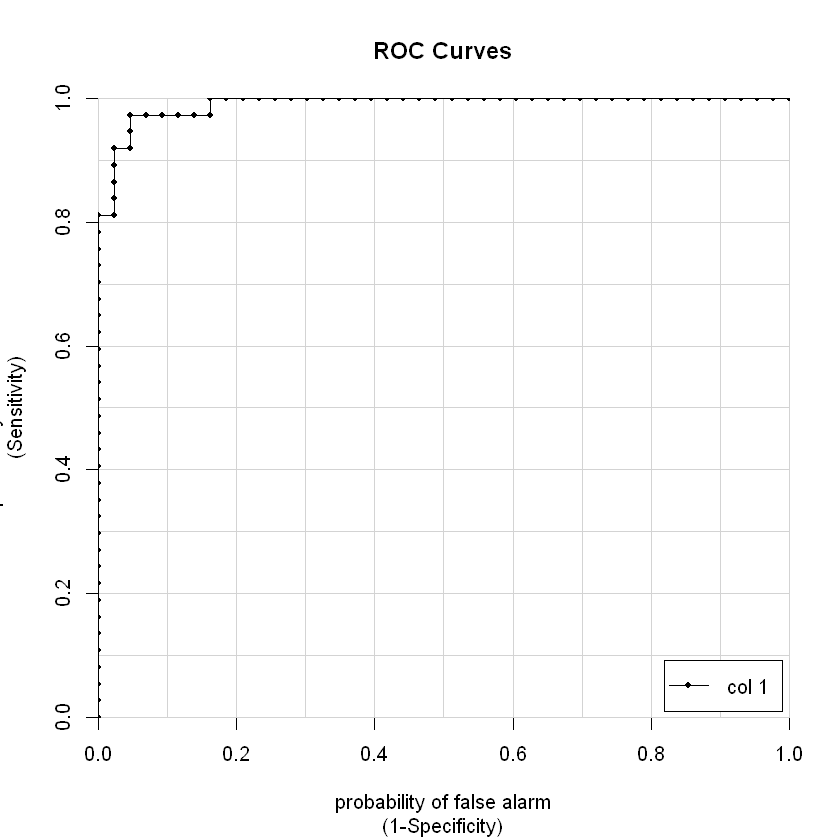

In [20]:
#USING ROC CURVE
install.packages("caTools")
library(caTools)

# Fit glm model: model
model <- glm(Sales2 ~ ., family = "binomial", train)
summary(model)

# Predict on test: p
p <- predict(model, test, type = "response")


# Make ROC curve #99% accuracy 
colAUC(p, test$Sales2, plotROC = TRUE)


In [21]:
# AUC Curve (area under curve) perfect score is 1

# Create trainControl object: myControl
myControl <- trainControl(
  method = "cv",
  number = 10,
  summaryFunction = twoClassSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE
)

In [22]:
# Train glm with custom trainControl: model
# must make outcome column a factor for classification first
df_c <- df[-4] # get rid of 4th column

# this doesnt work 0 and 1 are not proper classes
#first convert column to factor for next step 
df_c$Sales2 <- as.factor(df_c$Sales2) 

#do this once column 0 and 1 converted to factor 
levels(df_c$Sales2) <- c("first_class","second_class")

In [23]:
model <- train(
  Sales2 ~ ., 
  df_c, 
  method = "glm",
  trControl = myControl
)

# Print model to console
model

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: parameter=none 
- Fold01: parameter=none 
+ Fold02: parameter=none 
- Fold02: parameter=none 
+ Fold03: parameter=none 
- Fold03: parameter=none 
+ Fold04: parameter=none 
- Fold04: parameter=none 
+ Fold05: parameter=none 
- Fold05: parameter=none 
+ Fold06: parameter=none 
- Fold06: parameter=none 
+ Fold07: parameter=none 
- Fold07: parameter=none 
+ Fold08: parameter=none 
- Fold08: parameter=none 
+ Fold09: parameter=none 
- Fold09: parameter=none 
+ Fold10: parameter=none 
- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set


Generalized Linear Model 

200 samples
  3 predictor
  2 classes: 'first_class', 'second_class' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 180, 180, 180, 180, 180, 180, ... 
Resampling results:

  ROC        Sens       Spec
  0.9949495  0.9454545  0.9 


In [24]:
# TUNING MODEL PARAMETERS TO IMPROVE PERFORMANCE LEFT OFF ON MODULE 3 IN CARET
# WORKING WITH RANDOM FOREST!!!!!!!!!!!!
wine <- read.csv("wine.csv")

#Out of sample error 
#First lets split our data
set.seed(35)

# Shuffle row indices:rows
rowsw <- sample(nrow(wine))

#Randomly order data
shuffled_dfw <- wine[rowsw, ]

# Determine row to split on: split
splitw <- round(nrow(wine) * 0.80) # use 80% of data for training

# Create train
trainw <- wine[1:split, ] # 1:80% of dataset or row 160 

# Create test
testw <- wine[(splitw + 1):nrow(wine), ] # take the rest of the rows in the df that is not test


In [25]:
# Fit random forest: model
w_model <- train(
  quality ~ .,
  tuneLength = 1,
  data = wine, 
  method = "ranger",
  trControl = trainControl(
    method = "cv", 
    number = 5, 
    verboseIter = TRUE
  )
)

# Print model to console
w_model

+ Fold1: mtry=3, min.node.size=5, splitrule=variance 
- Fold1: mtry=3, min.node.size=5, splitrule=variance 
+ Fold1: mtry=3, min.node.size=5, splitrule=extratrees 
- Fold1: mtry=3, min.node.size=5, splitrule=extratrees 
+ Fold2: mtry=3, min.node.size=5, splitrule=variance 
- Fold2: mtry=3, min.node.size=5, splitrule=variance 
+ Fold2: mtry=3, min.node.size=5, splitrule=extratrees 
- Fold2: mtry=3, min.node.size=5, splitrule=extratrees 
+ Fold3: mtry=3, min.node.size=5, splitrule=variance 
- Fold3: mtry=3, min.node.size=5, splitrule=variance 
+ Fold3: mtry=3, min.node.size=5, splitrule=extratrees 
- Fold3: mtry=3, min.node.size=5, splitrule=extratrees 
+ Fold4: mtry=3, min.node.size=5, splitrule=variance 
- Fold4: mtry=3, min.node.size=5, splitrule=variance 
+ Fold4: mtry=3, min.node.size=5, splitrule=extratrees 
- Fold4: mtry=3, min.node.size=5, splitrule=extratrees 
+ Fold5: mtry=3, min.node.size=5, splitrule=variance 
- Fold5: mtry=3, min.node.size=5, splitrule=variance 
+ Fold5: mtr

Random Forest 

4898 samples
  11 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 3918, 3919, 3919, 3918, 3918 
Resampling results across tuning parameters:

  splitrule   RMSE       Rsquared   MAE      
  variance    0.6081825  0.5363162  0.4389232
  extratrees  0.6188011  0.5303564  0.4585664

Tuning parameter 'mtry' was held constant at a value of 3
Tuning
 parameter 'min.node.size' was held constant at a value of 5
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were mtry = 3, splitrule = variance
 and min.node.size = 5.

In [26]:
install.packages("mlbench")
library(mlbench)

# Fit random forest: model
model <- train(
  quality ~ .,
  tuneLength = 3,
  data = wine, 
  method = "ranger",
  trControl = trainControl(
    method = "cv", 
    number = 5, 
    verboseIter = TRUE
  )
)

# Print model to console
model

Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'mlbench' is in use and will not be installed"

+ Fold1: mtry= 2, min.node.size=5, splitrule=variance 
- Fold1: mtry= 2, min.node.size=5, splitrule=variance 
+ Fold1: mtry= 6, min.node.size=5, splitrule=variance 
- Fold1: mtry= 6, min.node.size=5, splitrule=variance 
+ Fold1: mtry=11, min.node.size=5, splitrule=variance 
- Fold1: mtry=11, min.node.size=5, splitrule=variance 
+ Fold1: mtry= 2, min.node.size=5, splitrule=extratrees 
- Fold1: mtry= 2, min.node.size=5, splitrule=extratrees 
+ Fold1: mtry= 6, min.node.size=5, splitrule=extratrees 
- Fold1: mtry= 6, min.node.size=5, splitrule=extratrees 
+ Fold1: mtry=11, min.node.size=5, splitrule=extratrees 
- Fold1: mtry=11, min.node.size=5, splitrule=extratrees 
+ Fold2: mtry= 2, min.node.size=5, splitrule=variance 
- Fold2: mtry= 2, min.node.size=5, splitrule=variance 
+ Fold2: mtry= 6, min.node.size=5, splitrule=variance 
- Fold2: mtry= 6, min.node.size=5, splitrule=variance 
+ Fold2: mtry=11, min.node.size=5, splitrule=variance 
- Fold2: mtry=11, min.node.size=5, splitrule=variance

Random Forest 

4898 samples
  11 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 3919, 3918, 3919, 3918, 3918 
Resampling results across tuning parameters:

  mtry  splitrule   RMSE       Rsquared   MAE      
   2    variance    0.6085447  0.5399014  0.4413330
   2    extratrees  0.6247293  0.5286797  0.4661161
   6    variance    0.6083232  0.5334639  0.4366973
   6    extratrees  0.6122151  0.5344688  0.4481219
  11    variance    0.6125244  0.5247595  0.4393770
  11    extratrees  0.6122137  0.5301375  0.4448733

Tuning parameter 'min.node.size' was held constant at a value of 5
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were mtry = 6, splitrule = variance
 and min.node.size = 5.

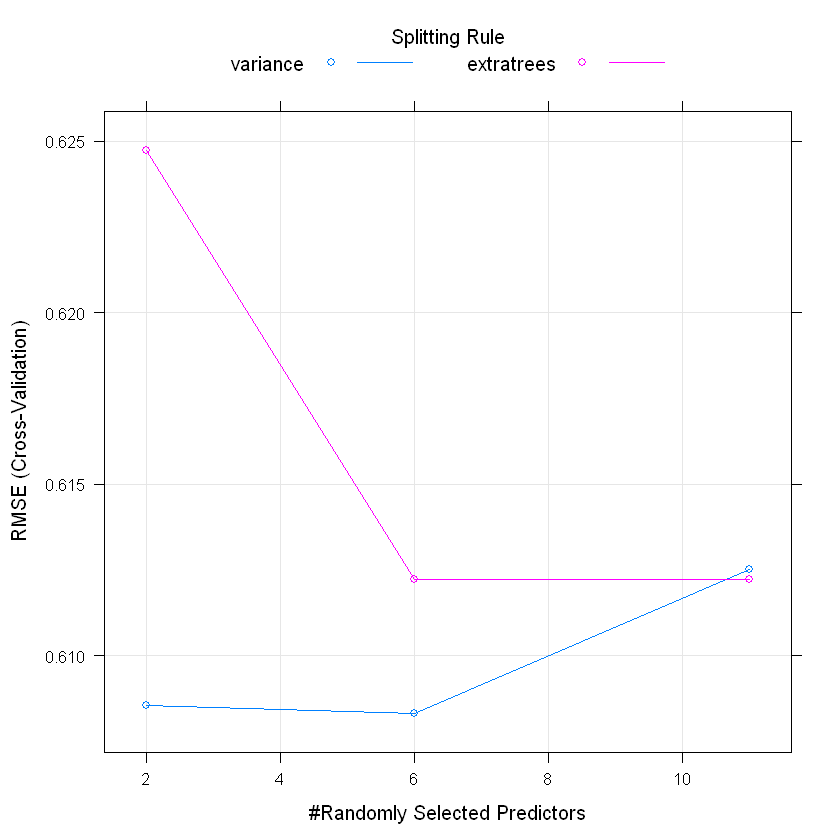

In [27]:
# MAKING A TUNING GRID FOR TRYING DIFFERENT 
# Define the tuning grid: tuneGrid
tuneGrid <- data.frame(
  .mtry = c(2, 3, 7),
  .splitrule = "variance",
  .min.node.size = 5
)
# Plot model
plot(model)


In [29]:
# CUSTOM TUNING GRIDS TRYING DIFFERENT HYPERPARAMETER MODEL SPACE TUNING 
# Fit random forest: model
model <- train(
  quality ~ .,
  tuneGrid = tuneGrid,
  data = wine, 
  method = "ranger",
  trControl = trainControl(
    method = "cv", 
    number = 5, 
    verboseIter = TRUE
  )
)

# Print model to console
model


+ Fold1: mtry=2, splitrule=variance, min.node.size=5 
- Fold1: mtry=2, splitrule=variance, min.node.size=5 
+ Fold1: mtry=3, splitrule=variance, min.node.size=5 
- Fold1: mtry=3, splitrule=variance, min.node.size=5 
+ Fold1: mtry=7, splitrule=variance, min.node.size=5 
- Fold1: mtry=7, splitrule=variance, min.node.size=5 
+ Fold2: mtry=2, splitrule=variance, min.node.size=5 
- Fold2: mtry=2, splitrule=variance, min.node.size=5 
+ Fold2: mtry=3, splitrule=variance, min.node.size=5 
- Fold2: mtry=3, splitrule=variance, min.node.size=5 
+ Fold2: mtry=7, splitrule=variance, min.node.size=5 
- Fold2: mtry=7, splitrule=variance, min.node.size=5 
+ Fold3: mtry=2, splitrule=variance, min.node.size=5 
- Fold3: mtry=2, splitrule=variance, min.node.size=5 
+ Fold3: mtry=3, splitrule=variance, min.node.size=5 
- Fold3: mtry=3, splitrule=variance, min.node.size=5 
+ Fold3: mtry=7, splitrule=variance, min.node.size=5 
- Fold3: mtry=7, splitrule=variance, min.node.size=5 
+ Fold4: mtry=2, splitrule=v

Random Forest 

4898 samples
  11 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 3919, 3918, 3919, 3918, 3918 
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared   MAE      
  2     0.6053453  0.5432712  0.4401353
  3     0.6042612  0.5420155  0.4371386
  7     0.6059193  0.5355082  0.4362441

Tuning parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were mtry = 3, splitrule = variance
 and min.node.size = 5.

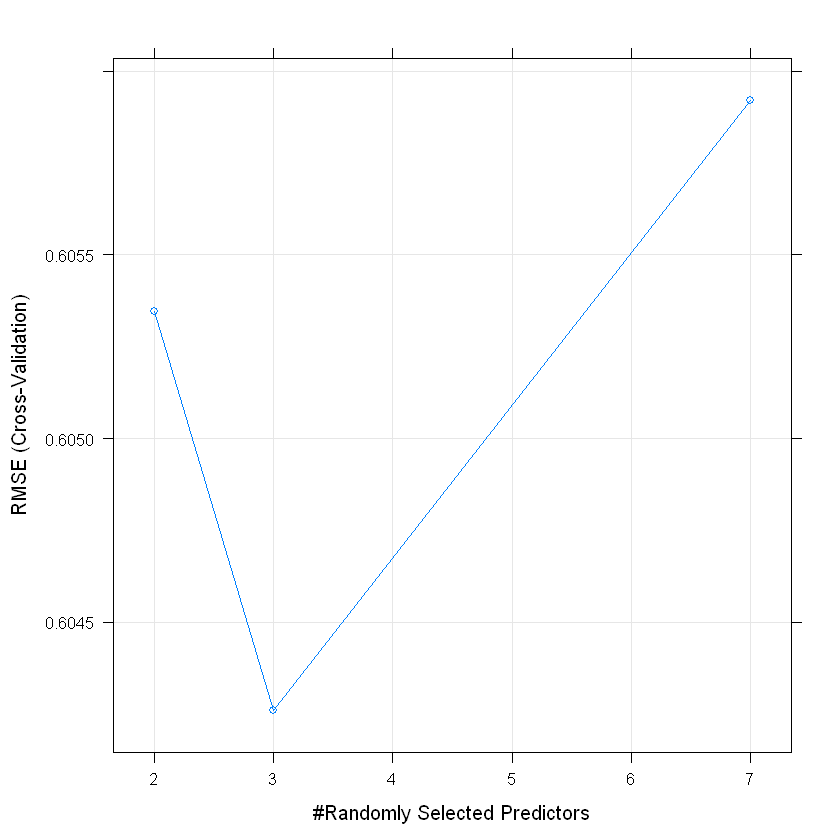

In [30]:
# Plot model
plot(model)

In [31]:
# GLMNET!!!! COMBINATION OF LASSO AND RIDGE REGRESSION 
install.packages("glmnet")
library(glmnet)
install.packages("RANN")
library(RANN)


Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'glmnet' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glmnet'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\blake\Documents\R\win-library\3.6\00LOCK\glmnet\libs\x64\glmnet.dll to C:\Users\blake\Documents\R\win-library\3.6\glmnet\libs\x64\glmnet.dll: Permission denied"Warning message:
"restored 'glmnet'"


The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\RtmpIdDtCN\downloaded_packages


Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Loaded glmnet 3.0-2

Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'RANN' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\RtmpIdDtCN\downloaded_packages


Warning message:
"package 'RANN' was built under R version 3.6.3"

In [32]:
wine$quality <- ifelse(wine$quality >= 7,1,0) # convert to 0 or 1
wine$quality <- factor(c("level1","level2")) # convert to non 0 or 1 factor levels

In [33]:
# Create custom trainControl: myControl
myControl <- trainControl(
  method = "cv", 
  number = 10,
  summaryFunction = twoClassSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE
)

# Fit glmnet model: model
model <- train(
  quality~ ., 
  wine,
  method = "glmnet",
  trControl = myControl
)

# Print model to console
model

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: alpha=0.10, lambda=0.001626 
- Fold01: alpha=0.10, lambda=0.001626 
+ Fold01: alpha=0.55, lambda=0.001626 
- Fold01: alpha=0.55, lambda=0.001626 
+ Fold01: alpha=1.00, lambda=0.001626 
- Fold01: alpha=1.00, lambda=0.001626 
+ Fold02: alpha=0.10, lambda=0.001626 
- Fold02: alpha=0.10, lambda=0.001626 
+ Fold02: alpha=0.55, lambda=0.001626 
- Fold02: alpha=0.55, lambda=0.001626 
+ Fold02: alpha=1.00, lambda=0.001626 
- Fold02: alpha=1.00, lambda=0.001626 
+ Fold03: alpha=0.10, lambda=0.001626 
- Fold03: alpha=0.10, lambda=0.001626 
+ Fold03: alpha=0.55, lambda=0.001626 
- Fold03: alpha=0.55, lambda=0.001626 
+ Fold03: alpha=1.00, lambda=0.001626 
- Fold03: alpha=1.00, lambda=0.001626 
+ Fold04: alpha=0.10, lambda=0.001626 
- Fold04: alpha=0.10, lambda=0.001626 
+ Fold04: alpha=0.55, lambda=0.001626 
- Fold04: alpha=0.55, lambda=0.001626 
+ Fold04: alpha=1.00, lambda=0.001626 
- Fold04: alpha=1.00, lambda=0.001626 
+ Fold05: alpha=0.10, lambda=0.001626 
- Fold05: alpha=0.10, lam

glmnet 

4898 samples
  11 predictor
   2 classes: 'level1', 'level2' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4408, 4408, 4409, 4408, 4409, 4408, ... 
Resampling results across tuning parameters:

  alpha  lambda        ROC        Sens       Spec     
  0.10   1.625597e-05  0.4779146  0.4826581  0.4867431
  0.10   1.625597e-04  0.4779146  0.4826581  0.4867431
  0.10   1.625597e-03  0.4780098  0.4806122  0.4863349
  0.55   1.625597e-05  0.4781197  0.4785714  0.4867431
  0.55   1.625597e-04  0.4781197  0.4785714  0.4867431
  0.55   1.625597e-03  0.4781434  0.4753095  0.4830562
  1.00   1.625597e-05  0.4781429  0.4781649  0.4863332
  1.00   1.625597e-04  0.4781429  0.4781649  0.4863332
  1.00   1.625597e-03  0.4821985  0.4769421  0.4883623

ROC was used to select the optimal model using the largest value.
The final values used for the model were alpha = 1 and lambda = 0.001625597.

In [34]:

# Print maximum ROC statistic
max(model[["results"]][["ROC"]])

[1] 0.4821985

In [35]:
# CUSTOM TUNING GLMNET GRID
# Train glmnet with custom trainControl and tuning: model
model <- train(
  quality ~ ., 
  wine,
  tuneGrid = expand.grid(
    alpha = 0:1,
    lambda = seq(0.0001, 1, length = 20)
  ),
  method = "glmnet",
  trControl = myControl
)

# Print model to console
model


Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: alpha=0, lambda=1 
- Fold01: alpha=0, lambda=1 
+ Fold01: alpha=1, lambda=1 
- Fold01: alpha=1, lambda=1 
+ Fold02: alpha=0, lambda=1 
- Fold02: alpha=0, lambda=1 
+ Fold02: alpha=1, lambda=1 
- Fold02: alpha=1, lambda=1 
+ Fold03: alpha=0, lambda=1 
- Fold03: alpha=0, lambda=1 
+ Fold03: alpha=1, lambda=1 
- Fold03: alpha=1, lambda=1 
+ Fold04: alpha=0, lambda=1 
- Fold04: alpha=0, lambda=1 
+ Fold04: alpha=1, lambda=1 
- Fold04: alpha=1, lambda=1 
+ Fold05: alpha=0, lambda=1 
- Fold05: alpha=0, lambda=1 
+ Fold05: alpha=1, lambda=1 
- Fold05: alpha=1, lambda=1 
+ Fold06: alpha=0, lambda=1 
- Fold06: alpha=0, lambda=1 
+ Fold06: alpha=1, lambda=1 
- Fold06: alpha=1, lambda=1 
+ Fold07: alpha=0, lambda=1 
- Fold07: alpha=0, lambda=1 
+ Fold07: alpha=1, lambda=1 
- Fold07: alpha=1, lambda=1 
+ Fold08: alpha=0, lambda=1 
- Fold08: alpha=0, lambda=1 
+ Fold08: alpha=1, lambda=1 
- Fold08: alpha=1, lambda=1 
+ Fold09: alpha=0, lambda=1 
- Fold09: alpha=0, lambda=1 
+ Fold09: alph

glmnet 

4898 samples
  11 predictor
   2 classes: 'level1', 'level2' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4408, 4409, 4408, 4408, 4408, 4408, ... 
Resampling results across tuning parameters:

  alpha  lambda      ROC        Sens       Spec     
  0      0.00010000  0.4785045  0.5006323  0.4765590
  0      0.05272632  0.4785045  0.5006323  0.4765590
  0      0.10535263  0.4785045  0.5006323  0.4765590
  0      0.15797895  0.4785045  0.5006323  0.4765590
  0      0.21060526  0.4785045  0.5006323  0.4765590
  0      0.26323158  0.4785045  0.5006323  0.4765590
  0      0.31585789  0.4785045  0.5006323  0.4765590
  0      0.36848421  0.4785045  0.5006323  0.4765590
  0      0.42111053  0.4785045  0.5006323  0.4765590
  0      0.47373684  0.4785045  0.5006323  0.4765590
  0      0.52636316  0.4785045  0.5006323  0.4765590
  0      0.57898947  0.4785045  0.5006323  0.4765590
  0      0.63161579  0.4785045  0.5006323  0.4765590
  0      0.684242

In [36]:
# Print maximum ROC statistic
max(model[["results"]][["ROC"]])

[1] 0.5

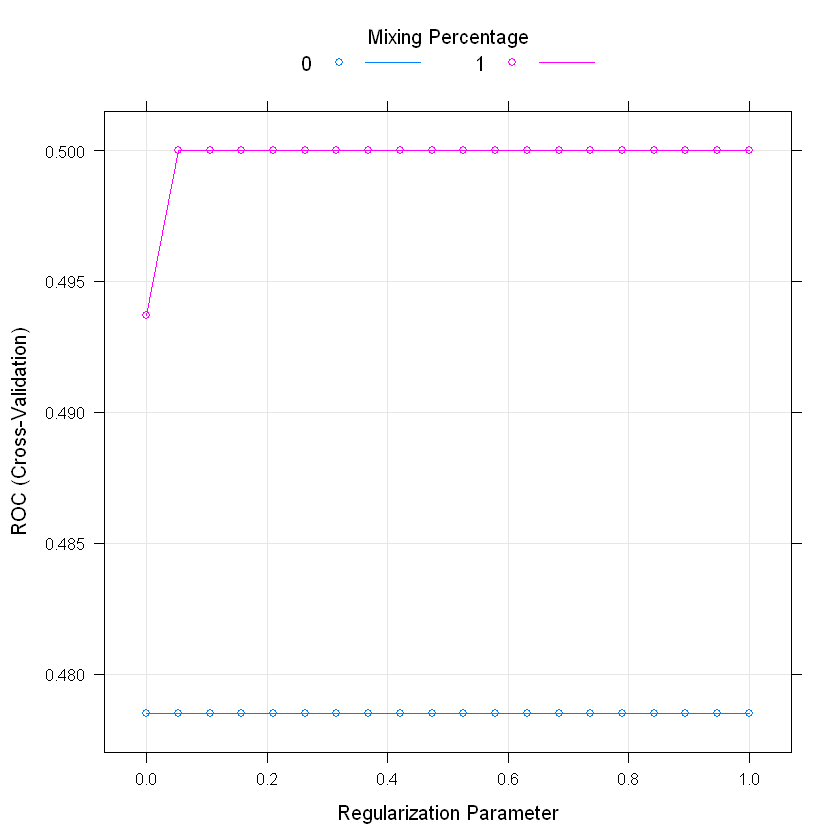

In [37]:
plot(model)

In [38]:
install.packages("randomForest")
library(randomForest)
#set seed
set.seed(48)

# Creating 10 missing values in the TV column  missing at random 
df[sample(1:nrow(df), 10), "TV"] <- NA;

# Splitting target from predictors
Y <- df$Sales
X <- df[,1:3]

Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\RtmpIdDtCN\downloaded_packages


Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



In [40]:
# try to fit model 
model <- train(X, Y)

# now lets do it with median imputation
model <- train(X,Y, preProcess = "medianImpute")

print(model)

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Warning message:
"model fit failed for Resample01: mtry=2 Error in randomForest.default(x, y, mtry = param$mtry, ...) : 
  NA not permitted in predictors
"Warning message:
"model fit failed for Resample01: mtry=3 Error in randomForest.default(x, y, mtry = param$mtry, ...) : 
  NA not permitted in predictors
"Warning message:
"model fit failed for Resample02: mtry=2 Error in randomForest.default(x, y, mtry = param$mtry, ...) : 
  NA not permitted in predictors
"Warning message:
"model fit failed for Resample02: mtry=3 Error in randomForest.default(x, y, mtry = param$mtry, ...) : 
  NA not permitted in predictors
"Warning message:
"model fit failed for Resample03: mtry=2 Error in randomForest.default(x, y, mtry = param$mtry, ...) : 
  NA not permitted in predictors
"Warning message:
"model fit failed for Resample03: mtry=3 Error in randomForest.default(x, y, mtry = param$mtry, ...) : 
  NA not permitted in predictors
"Warning message:
"model fit failed for Resample04: mtry=2 Error in ran

Something is wrong; all the RMSE metric values are missing:
      RMSE        Rsquared        MAE     
 Min.   : NA   Min.   : NA   Min.   : NA  
 1st Qu.: NA   1st Qu.: NA   1st Qu.: NA  
 Median : NA   Median : NA   Median : NA  
 Mean   :NaN   Mean   :NaN   Mean   :NaN  
 3rd Qu.: NA   3rd Qu.: NA   3rd Qu.: NA  
 Max.   : NA   Max.   : NA   Max.   : NA  
 NA's   :2     NA's   :2     NA's   :2    


ERROR: Error: Stopping


In [41]:
Y <- df$Sales2
df$Sales2 <- factor(c("level1","level2")) # convert to non 0 or 1 factor levels
Y <- df$Sales2

In [42]:
# Median imputation 
median_model <- train(
  x = X, 
  y = Y,
  method = "glm",
  trControl = myControl,
  preProcess = "medianImpute"
)

Warning message in train.default(x = X, y = Y, method = "glm", trControl = myControl, :
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: parameter=none 
- Fold01: parameter=none 
+ Fold02: parameter=none 
- Fold02: parameter=none 
+ Fold03: parameter=none 
- Fold03: parameter=none 
+ Fold04: parameter=none 
- Fold04: parameter=none 
+ Fold05: parameter=none 
- Fold05: parameter=none 
+ Fold06: parameter=none 
- Fold06: parameter=none 
+ Fold07: parameter=none 
- Fold07: parameter=none 
+ Fold08: parameter=none 
- Fold08: parameter=none 
+ Fold09: parameter=none 
- Fold09: parameter=none 
+ Fold10: parameter=none 
- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set


In [43]:
# Print median_model to console
median_model


Generalized Linear Model 

200 samples
  3 predictor
  2 classes: 'level1', 'level2' 

Pre-processing: median imputation (3) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 180, 180, 180, 180, 180, 180, ... 
Resampling results:

  ROC    Sens  Spec
  0.521  0.53  0.5 


In [44]:
#KNN Imputation
# it is better for missing not at random
# example of missing not at random 
#df[df$Newspaper > 15, "Radio"] <- NA
# We will use missing at random though not mnar
install.packages("RANN")
library(RANN)

Y <- df$Sales2

# Apply KNN imputation: knn_model
knn_model <- train(
  x = X, 
  y = Y,
  method = "glm",
  trControl = myControl,
  preProcess = "knnImpute"
)

# Print knn_model to console
knn_model


Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'RANN' is in use and will not be installed"Warning message in train.default(x = X, y = Y, method = "glm", trControl = myControl, :
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: parameter=none 
- Fold01: parameter=none 
+ Fold02: parameter=none 
- Fold02: parameter=none 
+ Fold03: parameter=none 
- Fold03: parameter=none 
+ Fold04: parameter=none 
- Fold04: parameter=none 
+ Fold05: parameter=none 
- Fold05: parameter=none 
+ Fold06: parameter=none 
- Fold06: parameter=none 
+ Fold07: parameter=none 
- Fold07: parameter=none 
+ Fold08: parameter=none 
- Fold08: parameter=none 
+ Fold09: parameter=none 
- Fold09: parameter=none 
+ Fold10: parameter=none 
- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set


Generalized Linear Model 

200 samples
  3 predictor
  2 classes: 'level1', 'level2' 

Pre-processing: nearest neighbor imputation (3), centered (3), scaled (3) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 180, 180, 180, 180, 180, 180, ... 
Resampling results:

  ROC    Sens  Spec
  0.523  0.52  0.54


# Multiple preprocessing methods

In [45]:
# MULTI PRE PROCESSING METHODS
# Order of operations(impute, center and then scale) then model fit

# Update model with standardization
model <- train(
  x = X, 
  y = Y,
  method = "glm",
  trControl = myControl,
  preProcess = c("medianImpute", "center", "scale") #first impute then center then scale your data then pca
)

# Print updated model
model


Warning message in train.default(x = X, y = Y, method = "glm", trControl = myControl, :
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: parameter=none 
- Fold01: parameter=none 
+ Fold02: parameter=none 
- Fold02: parameter=none 
+ Fold03: parameter=none 
- Fold03: parameter=none 
+ Fold04: parameter=none 
- Fold04: parameter=none 
+ Fold05: parameter=none 
- Fold05: parameter=none 
+ Fold06: parameter=none 
- Fold06: parameter=none 
+ Fold07: parameter=none 
- Fold07: parameter=none 
+ Fold08: parameter=none 
- Fold08: parameter=none 
+ Fold09: parameter=none 
- Fold09: parameter=none 
+ Fold10: parameter=none 
- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set


Generalized Linear Model 

200 samples
  3 predictor
  2 classes: 'level1', 'level2' 

Pre-processing: median imputation (3), centered (3), scaled (3) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 180, 180, 180, 180, 180, 180, ... 
Resampling results:

  ROC    Sens  Spec
  0.534  0.54  0.49


In [46]:
# Handing low information predictors!!!!!!!
# such as constant or close to constant variables
# we will add a constant column to the dataframe
# we will impute center scale then use pca
# zv removes constant columns
# nzv removes nearly constant columns 
# Identify near zero variance predictors: remove_cols

df$constant <- 1;

# identify near zero variance predictors aka df constant column 
remove_cols <- nearZeroVar(df, names = TRUE, 
                           freqCut = 2, uniqueCut = 20)

# Get all column names from df: all_calls
all_cols <- names(df)

# new dataframe without the df consstant
df_smaller <- df[ , setdiff(all_cols, remove_cols)]

In [48]:
Y <- df$Sales2
X <- df[,c(1,2,3,6)]# adding in the constant and using zv to remove constant then impute center scale and pca
# now this removes 
model <- train(
  x = X, 
  y = Y,
  method = "glm",
  trControl = myControl,
  preProcess = c("zv","medianImpute", "center", "scale","pca") #first impute then center then scale your data then pca
)
print(model)


Warning message in train.default(x = X, y = Y, method = "glm", trControl = myControl, :
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: parameter=none 
- Fold01: parameter=none 
+ Fold02: parameter=none 
- Fold02: parameter=none 
+ Fold03: parameter=none 
- Fold03: parameter=none 
+ Fold04: parameter=none 
- Fold04: parameter=none 
+ Fold05: parameter=none 
- Fold05: parameter=none 
+ Fold06: parameter=none 
- Fold06: parameter=none 
+ Fold07: parameter=none 
- Fold07: parameter=none 
+ Fold08: parameter=none 
- Fold08: parameter=none 
+ Fold09: parameter=none 
- Fold09: parameter=none 
+ Fold10: parameter=none 
- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set
Generalized Linear Model 

200 samples
  4 predictor
  2 classes: 'level1', 'level2' 

Pre-processing: median imputation (3), centered (3), scaled (3),
 principal component signal extraction (3), remove (1) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 180, 180, 180, 180, 180, 180, ... 
Resampling results:

  ROC   Sens  Spec
  0.51  0.52  0.51



# Principle Component Analysis

In [50]:
#Principle Component Analysis 
# pca searches for high variance linear combinations that are perpendicular to eachother
#load blood brain dataset from caret
#The vector logBBB contains the log concentration ratio and the data fame bbbDescr contains the descriptor values.
data(BloodBrain)
head(BloodBrain)

#identify near zero variance variables in dataset
names(bbbDescr)[nearZeroVar(bbbDescr)]

# Add PCA
set.seed(46)

model <- train(
  bbbDescr, # X predictors
  logBBB, # Y dependent
  method = "glm",
  trControl = trainControl(
    method = "cv", number = 10, verbose = TRUE
  ),
  preProcess = c("zv","center","scale","pca")
)
min(model$results$RMSE)


ERROR: Error in head(BloodBrain): object 'BloodBrain' not found


# CHURN PREDICTION

In [51]:
# CUSTOMER CHURN
library(caret)

churn <- read.csv("churn.csv")

summary(churn)


     state      account.length    area.code       phone.number 
 WV     : 106   Min.   :  1.0   Min.   :408.0   327-1058:   1  
 MN     :  84   1st Qu.: 74.0   1st Qu.:408.0   327-1319:   1  
 NY     :  83   Median :101.0   Median :415.0   327-3053:   1  
 AL     :  80   Mean   :101.1   Mean   :437.2   327-3587:   1  
 OH     :  78   3rd Qu.:127.0   3rd Qu.:510.0   327-3850:   1  
 OR     :  78   Max.   :243.0   Max.   :510.0   327-3954:   1  
 (Other):2824                                   (Other) :3327  
 international.plan voice.mail.plan number.vmail.messages total.day.minutes
 no :3010           no :2411        Min.   : 0.000        Min.   :  0.0    
 yes: 323           yes: 922        1st Qu.: 0.000        1st Qu.:143.7    
                                    Median : 0.000        Median :179.4    
                                    Mean   : 8.099        Mean   :179.8    
                                    3rd Qu.:20.000        3rd Qu.:216.4    
                                

In [53]:
#Out of sample error 
#First lets split our data
set.seed(39)

# Shuffle row indices:rows
rowsc <- sample(nrow(churn))

#Randomly order data
shuffled_dfc <- churn[rowsc, ]

# Determine row to split on: split
splitc <- round(nrow(churn) * 0.80) # use 80% of data for training

# Create train
trainc <- churn[1:splitc, ] # 1:80% of dataset or row 160 

# Create test
testc <- churn[(splitc + 1):nrow(churn), ] # take the rest of the rows in the df that is not test

# about 14% of customers churn
table(trainc$churn) / nrow(trainc)


    False      True 
0.8597149 0.1402851 

In [54]:
# train and test set cross validation indecies
set.seed(44)

myFolds <-createFolds(trainc$churn, k = 5)

# compare class distribution
# holds class distribution 14% churn
i <- myFolds$Fold1
table(trainc$churn[i]) / length(i)


    False      True 
0.8595506 0.1404494 

In [55]:
# make train control object
#allows exact same cross validation for each model for fair comparison
myControl <- trainControl(
  summaryFunction = twoClassSummary,
  classProbs = TRUE,
  verboseIter = TRUE,
  savePredictions = TRUE,
  index = myFolds # allows exact same cross validationo for each model 
  )


+ Fold1: alpha=0, lambda=1 
- Fold1: alpha=0, lambda=1 
+ Fold1: alpha=1, lambda=1 
- Fold1: alpha=1, lambda=1 
+ Fold2: alpha=0, lambda=1 
- Fold2: alpha=0, lambda=1 
+ Fold2: alpha=1, lambda=1 
- Fold2: alpha=1, lambda=1 
+ Fold3: alpha=0, lambda=1 
- Fold3: alpha=0, lambda=1 
+ Fold3: alpha=1, lambda=1 
- Fold3: alpha=1, lambda=1 
+ Fold4: alpha=0, lambda=1 
- Fold4: alpha=0, lambda=1 
+ Fold4: alpha=1, lambda=1 
- Fold4: alpha=1, lambda=1 
+ Fold5: alpha=0, lambda=1 
- Fold5: alpha=0, lambda=1 
+ Fold5: alpha=1, lambda=1 
- Fold5: alpha=1, lambda=1 
Aggregating results
Selecting tuning parameters
Fitting alpha = 0, lambda = 0.9 on full training set


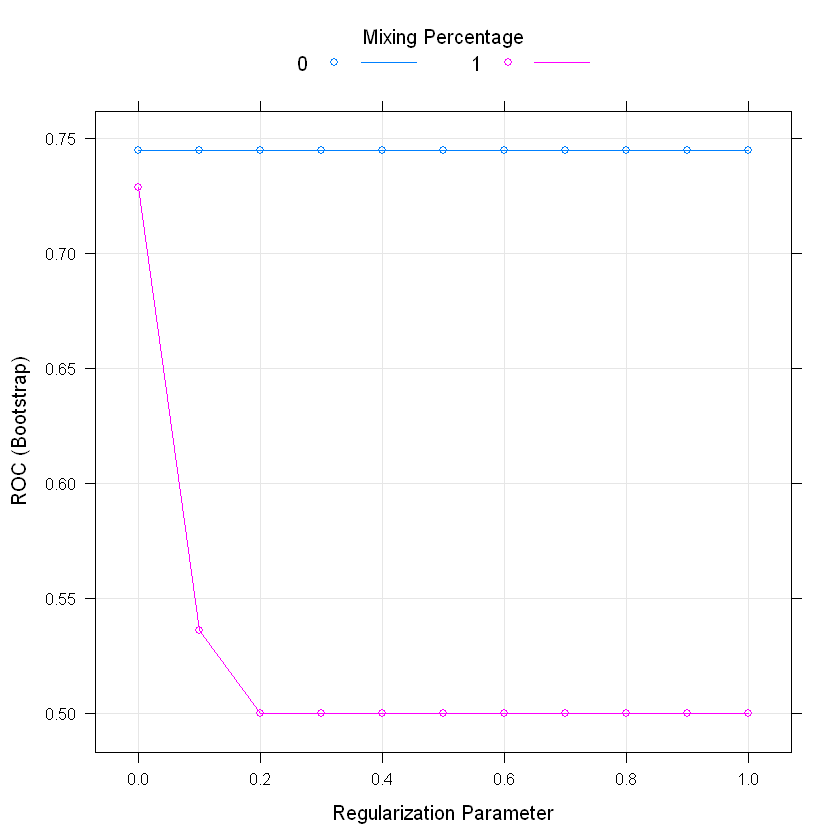

In [56]:
# start with glmnet 
# built in linear model with built in variable selection
# interpretable coefficients

set.seed(50)
model_glmnet <- train(
  churn ~.,
  trainc,
  metric = "ROC",
  method = "glmnet",
  tuneGrid = expand.grid(
    alpha = 0:1,
    lambda = 0:10 / 10
  ),
  trControl = myControl 
)

# looks like alpha of 1 yields best model 
plot(model_glmnet)

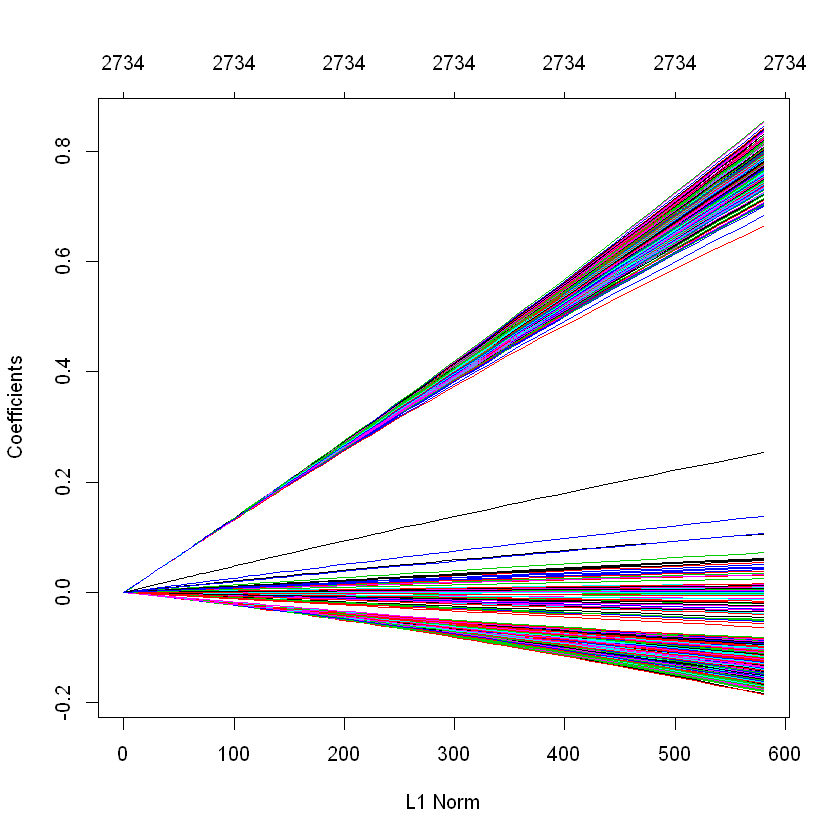

In [58]:
# plotting coefficients
plot(model_glmnet$finalModel)


In [67]:
# try random forest next !!!!
set.seed(99)
trainc$churn <- factor(c("level1","level2"))
X <- trainc[,c(1:20)]
Y <- trainc[,c(21)]

# Fit glmnet model: model_glmnet
model_glmnet <- train(
  x = X, 
  y = Y,
  metric = "ROC",
  method = "glmnet",
  trControl = myControl
)



Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"NAs introduced by coercion"

ERROR: Error in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, : NA/NaN/Inf in foreign function call (arg 5)


+ Fold1: mtry= 2, min.node.size=1, splitrule=gini 
- Fold1: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold1: mtry=11, min.node.size=1, splitrule=gini 
- Fold1: mtry=11, min.node.size=1, splitrule=gini 
+ Fold1: mtry=20, min.node.size=1, splitrule=gini 
- Fold1: mtry=20, min.node.size=1, splitrule=gini 
+ Fold1: mtry= 2, min.node.size=1, splitrule=extratrees 
model fit failed for Fold1: mtry= 2, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
 


Warning message:
"model fit failed for Fold1: mtry= 2, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
"

- Fold1: mtry= 2, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=11, min.node.size=1, splitrule=extratrees 
model fit failed for Fold1: mtry=11, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
 


Warning message:
"model fit failed for Fold1: mtry=11, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
"

- Fold1: mtry=11, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=20, min.node.size=1, splitrule=extratrees 
model fit failed for Fold1: mtry=20, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
 


Warning message:
"model fit failed for Fold1: mtry=20, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
"

- Fold1: mtry=20, min.node.size=1, splitrule=extratrees 
+ Fold2: mtry= 2, min.node.size=1, splitrule=gini 
- Fold2: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold2: mtry=11, min.node.size=1, splitrule=gini 
- Fold2: mtry=11, min.node.size=1, splitrule=gini 
+ Fold2: mtry=20, min.node.size=1, splitrule=gini 
- Fold2: mtry=20, min.node.size=1, splitrule=gini 
+ Fold2: mtry= 2, min.node.size=1, splitrule=extratrees 
model fit failed for Fold2: mtry= 2, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
 


Warning message:
"model fit failed for Fold2: mtry= 2, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
"

- Fold2: mtry= 2, min.node.size=1, splitrule=extratrees 
+ Fold2: mtry=11, min.node.size=1, splitrule=extratrees 
model fit failed for Fold2: mtry=11, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
 


Warning message:
"model fit failed for Fold2: mtry=11, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
"

- Fold2: mtry=11, min.node.size=1, splitrule=extratrees 
+ Fold2: mtry=20, min.node.size=1, splitrule=extratrees 
model fit failed for Fold2: mtry=20, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
 


Warning message:
"model fit failed for Fold2: mtry=20, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
"

- Fold2: mtry=20, min.node.size=1, splitrule=extratrees 
+ Fold3: mtry= 2, min.node.size=1, splitrule=gini 
- Fold3: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold3: mtry=11, min.node.size=1, splitrule=gini 
- Fold3: mtry=11, min.node.size=1, splitrule=gini 
+ Fold3: mtry=20, min.node.size=1, splitrule=gini 
- Fold3: mtry=20, min.node.size=1, splitrule=gini 
+ Fold3: mtry= 2, min.node.size=1, splitrule=extratrees 
model fit failed for Fold3: mtry= 2, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
 


Warning message:
"model fit failed for Fold3: mtry= 2, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
"

- Fold3: mtry= 2, min.node.size=1, splitrule=extratrees 
+ Fold3: mtry=11, min.node.size=1, splitrule=extratrees 
model fit failed for Fold3: mtry=11, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
 


Warning message:
"model fit failed for Fold3: mtry=11, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
"

- Fold3: mtry=11, min.node.size=1, splitrule=extratrees 
+ Fold3: mtry=20, min.node.size=1, splitrule=extratrees 
model fit failed for Fold3: mtry=20, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
 


Warning message:
"model fit failed for Fold3: mtry=20, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
"

- Fold3: mtry=20, min.node.size=1, splitrule=extratrees 
+ Fold4: mtry= 2, min.node.size=1, splitrule=gini 
- Fold4: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold4: mtry=11, min.node.size=1, splitrule=gini 
- Fold4: mtry=11, min.node.size=1, splitrule=gini 
+ Fold4: mtry=20, min.node.size=1, splitrule=gini 
- Fold4: mtry=20, min.node.size=1, splitrule=gini 
+ Fold4: mtry= 2, min.node.size=1, splitrule=extratrees 
model fit failed for Fold4: mtry= 2, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
 


Warning message:
"model fit failed for Fold4: mtry= 2, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
"

- Fold4: mtry= 2, min.node.size=1, splitrule=extratrees 
+ Fold4: mtry=11, min.node.size=1, splitrule=extratrees 
model fit failed for Fold4: mtry=11, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
 


Warning message:
"model fit failed for Fold4: mtry=11, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
"

- Fold4: mtry=11, min.node.size=1, splitrule=extratrees 
+ Fold4: mtry=20, min.node.size=1, splitrule=extratrees 
model fit failed for Fold4: mtry=20, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
 


Warning message:
"model fit failed for Fold4: mtry=20, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
"

- Fold4: mtry=20, min.node.size=1, splitrule=extratrees 
+ Fold5: mtry= 2, min.node.size=1, splitrule=gini 
- Fold5: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold5: mtry=11, min.node.size=1, splitrule=gini 
- Fold5: mtry=11, min.node.size=1, splitrule=gini 
+ Fold5: mtry=20, min.node.size=1, splitrule=gini 
- Fold5: mtry=20, min.node.size=1, splitrule=gini 
+ Fold5: mtry= 2, min.node.size=1, splitrule=extratrees 
model fit failed for Fold5: mtry= 2, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
 


Warning message:
"model fit failed for Fold5: mtry= 2, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
"

- Fold5: mtry= 2, min.node.size=1, splitrule=extratrees 
+ Fold5: mtry=11, min.node.size=1, splitrule=extratrees 
model fit failed for Fold5: mtry=11, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
 


Warning message:
"model fit failed for Fold5: mtry=11, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
"

- Fold5: mtry=11, min.node.size=1, splitrule=extratrees 
+ Fold5: mtry=20, min.node.size=1, splitrule=extratrees 
model fit failed for Fold5: mtry=20, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
 


Warning message:
"model fit failed for Fold5: mtry=20, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Too many levels in unordered categorical variable phone.number. Only 53 levels allowed on this system. Consider using the 'order' option.
"

- Fold5: mtry=20, min.node.size=1, splitrule=extratrees 


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

Aggregating results


Warning message in train.default(x = X, y = Y, metric = "ROC", method = "ranger", :
"missing values found in aggregated results"

Selecting tuning parameters
Fitting mtry = 2, splitrule = gini, min.node.size = 1 on full training set


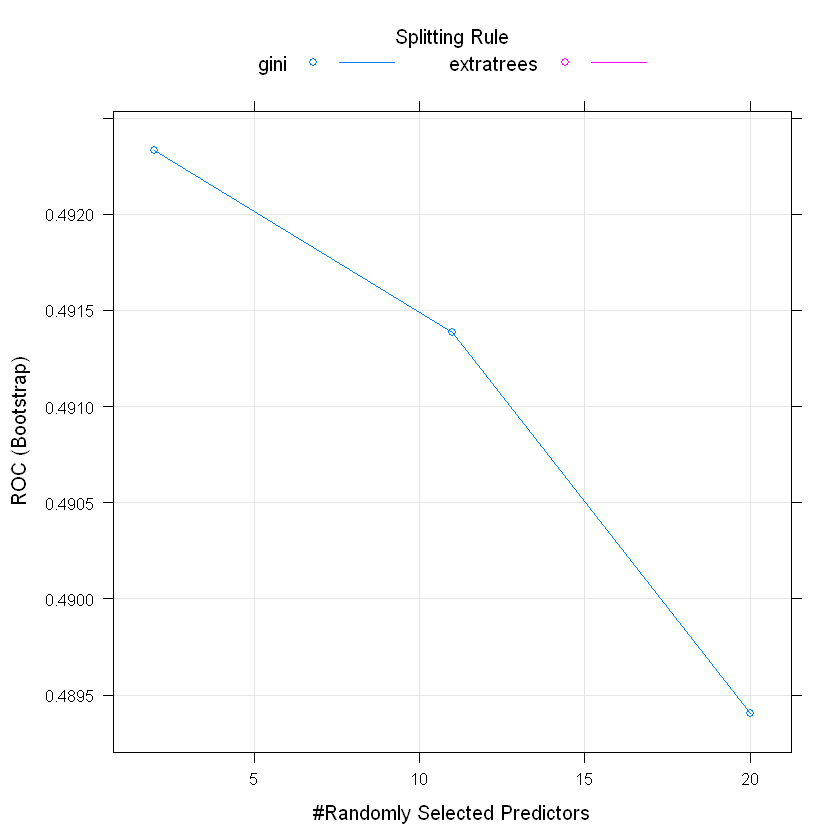

In [68]:
# Fit random forest: model_rf
model_rf <- train(
  x = X, 
  y = Y,
  metric = "ROC",
  method = "ranger",
  trControl = myControl
)

plot(model_rf)


Call:
summary.resamples(object = resamples)

Models: item1, item2 
Number of resamples: 5 

ROC 
           Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
item1 0.7330801 0.7361981 0.7393711 0.7446980 0.7464763 0.7683642    0
item2 0.4827930 0.4859648 0.4891720 0.4923312 0.4968934 0.5068329    0

Sens 
           Min.   1st Qu.    Median     Mean   3rd Qu.      Max. NA's
item1 1.0000000 1.0000000 1.0000000 1.000000 1.0000000 1.0000000    0
item2 0.4757009 0.4831461 0.5183099 0.506615 0.5196998 0.5362183    0

Spec 
           Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
item1 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000    0
item2 0.4676664 0.4737828 0.4911132 0.4934663 0.5145814 0.5201878    0


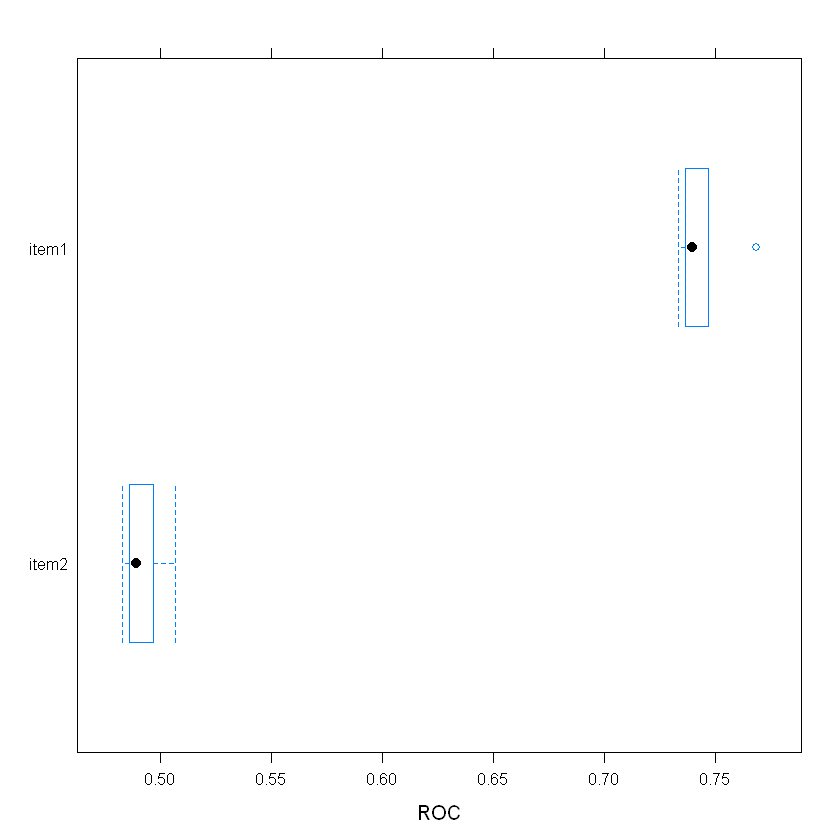

In [70]:
# Comparing models 
# Create model_list
model_list <- list(item1 = model_glmnet, item2 = model_rf)

# Pass model_list to resamples(): resamples
resamples <- resamples(model_list)

# Summarize the results
summary(resamples)

# BOX AND WISKER PLOT OF ROC
bwplot(resamples, metric = "ROC")



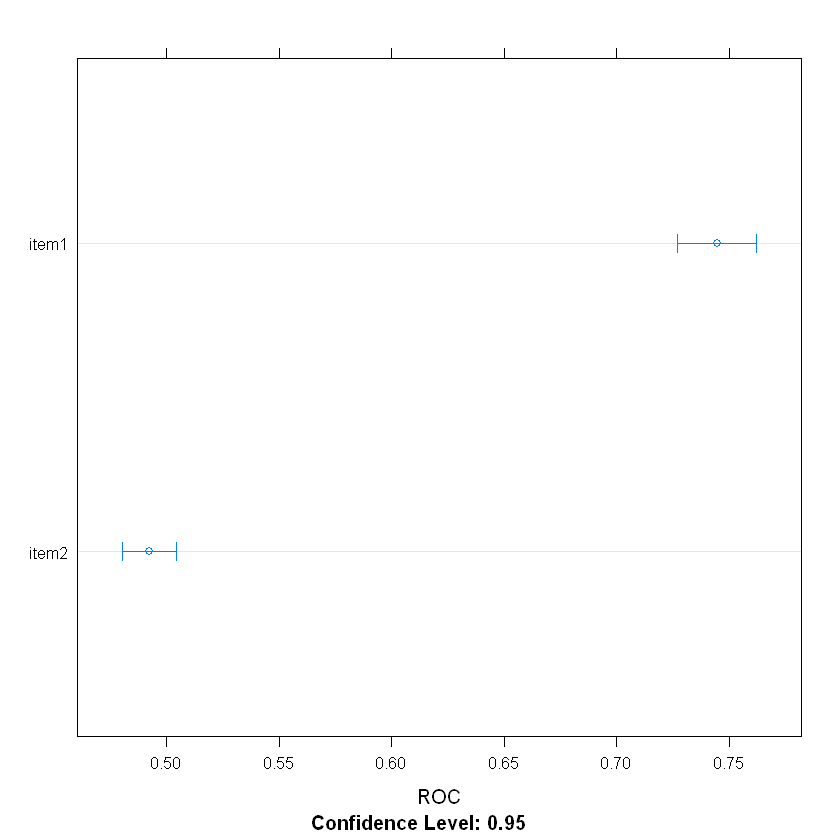

In [71]:
dotplot(resamples, metric = "ROC")


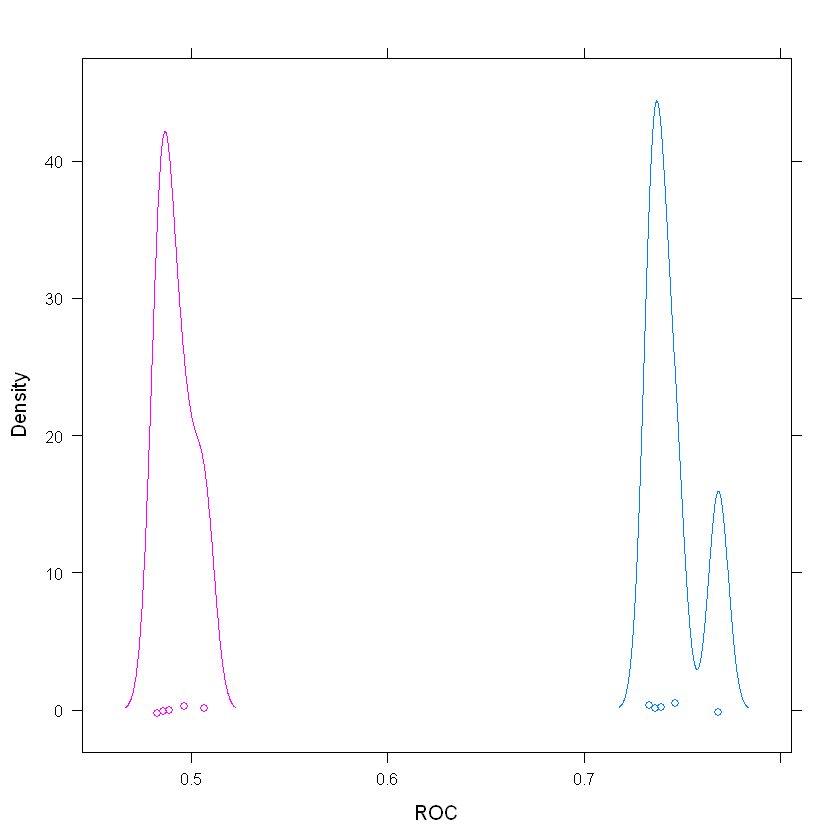

In [72]:

densityplot(resamples, metric = "ROC")


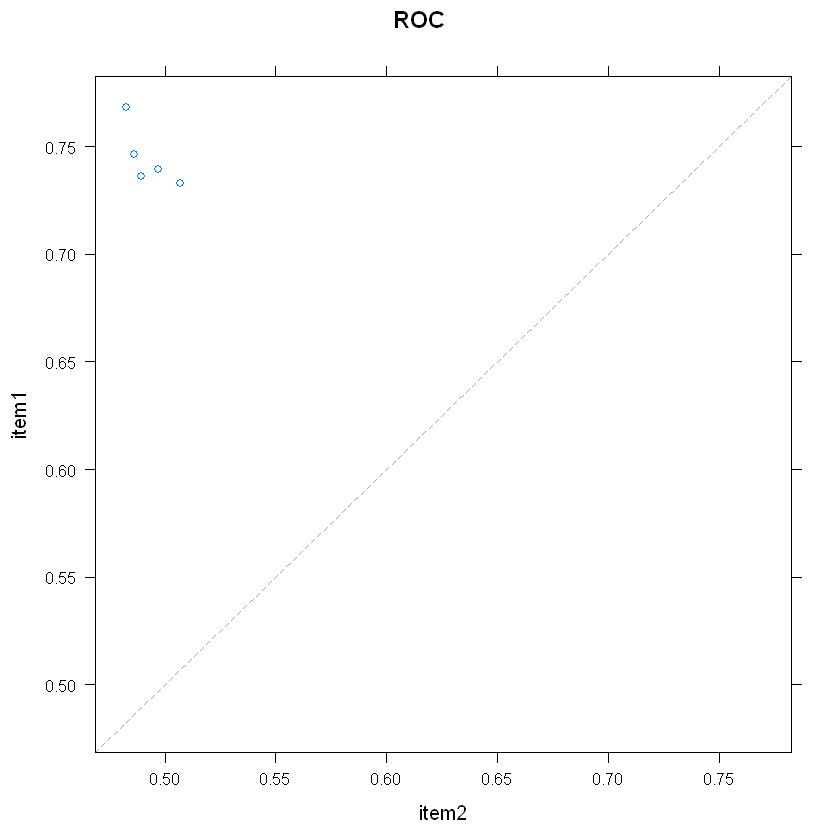

In [73]:
xyplot(resamples, metric = "ROC")

In [ ]:
# if you want to add another model 
install.packages("kernlab")
library(kernlab)

# ADD SVM
model_svm <- train(
  x = X, 
  y = Y,
  metric = "ROC",
  method = "svmLinear",
  trControl = myControl
)

model_list <- list(item1 = model_glmnet, item2 = model_rf, item3 = model_svm)

# Pass model_list to resamples(): resamples
resamples <- resamples(model_list)

# Summarize the results
summary(resamples)

# Create ensemble model: stack
# If you wanted to add extra models like svm 
stack <- caretStack(model_list, method = "glm")

# Look at summary
summary(stack)